In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import pygame

from pygame.locals import *

from OpenGL.GL import * 

from OpenGL.GLU import * 

import matplotlib.cm

from math import * 

from drawModuleChpThree import *


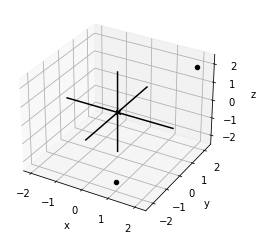

In [29]:

'''
3D Drawing with Python: The x, y, z axes that are drawn are perpendicular in the space, despite being skewed ny our perspective.
    The origin in (0,0,0) and the axes emanate from it in the positive and negative x, y, z directions.


Example:
    To plot the vectors (2, 2, 2) & (1, -2, -2) with the following code that produces figure 3.10:

'''
draw3d(
Points3D((2, 2, 2), (1, -2, -2))
)
    


c:\Users\JBarr\OneDrive\Documents\FinTech\mathemetics\mathForProgrammers\Math-for-Programmers\practiceFolder\drawModuleChpThree.py:173: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


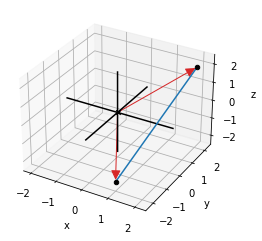

In [30]:
"""
To visualize these vectorss instead as arrows, we can represent the vectors as Arrow3D objects.
We can also connect the tips of arrows with a Segment3D object as follows
"""


draw3d(
Points3D((2, 2, 2), (1, -2, -2)),
Arrow3D((2, 2, 2)),
Arrow3D((1, -2, -2)),
Segment3D((2, 2, 2), (1, -2, -2))
)

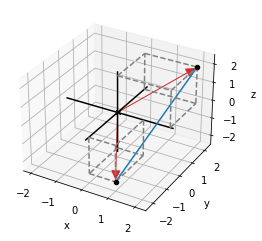

In [37]:
# To represent a box with one corner at the origin and the opposite one at a given point

draw3d(
    Points3D((2, 2, 2), (1,-2,-2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1, -2, -2)),
    Box3D(2,2,2),
    Box3D(1, -2, -2)
    )

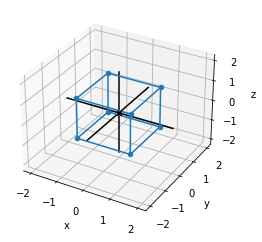

In [39]:
"""
With exactly eight 3D vectors whose coordinates are all either +1 or -1. For instance (1, -1, 1) is one of these.
Plot all off these eight vector points. Then figure out how to commect them with line segments using Segment3D objects to form the outline of a cube.
"""

pm1 = [1,-1]

vectices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1] + \
            [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1] +\
            [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vectices, color=blue),
    *[Segment3D(*edge) for edge in edges]
)